# Breast Cancer Campaign 

# Essential Purpose
Skills tested:
Using Pandas to access and explore the dataset.
Using Pandas to cleanse columns and choose features.
Using Scikit-Learn to preprocess the data before training.
Using Matplotlib and Seaborn for data visualization and interpretation.
Using decision trees, random forests and support vector machine (SVM) regressors for regression modeling and testing data.
Using Scikit-Learn for regression evaluation and enhancement.

After the success of the second part of the campaign, the medical insurance company has become more and more into the idea of awareness-raising campaigns. However, the board needs confirmation on the company’s expenses to make sure of their financial status.

Before you can look at the financial reports, you are required to perform regression modeling on an insurance dataset to predict the expenses based on some information about patients.

You are required to:

Perform EDA and visualization on the dataset.
Implement different regression models.
Get an acceptable R-squared score.
Submission of your project on GitHub is optional. If you choose to manage your project using GitHub, find guidelines for using GitHub here. Ensure you are coding using your Jupyter Notebook – it will be uploaded to GitHub when you perform a GIT push operation.

You are expected to write around 25 lines of code to complete this project.

# Download the Dataset
# Read the Dataset
Read the dataset into a Pandas Dataframe.
Does the dataset include any missing values? If so, drop them.
Hint: Pandas can do that with one line of code!

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('insurance.csv')
df.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Perform Preprocessing
Perform any needed preprocessing on the chosen features including:
Scaling.
Encoding.
Dealing with Nan values.
Normalization.

In [3]:
y=df["charges"].values

In [4]:
numerical = df[["age","bmi","children"]]
categorical = df[["sex","smoker"]]


In [5]:
categorical = pd.get_dummies(categorical)
categorical

,sex_female,sex_male,smoker_no,smoker_yes
0,1,0,0,1
1,0,1,1,0
2,0,1,1,0
3,0,1,1,0
4,0,1,1,0
...,...,...,...,...
1333,0,1,1,0
1334,1,0,1,0
1335,1,0,1,0
1336,1,0,1,0


In [6]:
features = pd.concat([numerical, categorical], axis = 1)
features

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,1,0,0,1
1,18,33.770,1,0,1,1,0
2,28,33.000,3,0,1,1,0
3,33,22.705,0,0,1,1,0
4,32,28.880,0,0,1,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0
1334,18,31.920,0,1,0,1,0
1335,18,36.850,0,1,0,1,0
1336,21,25.800,0,1,0,1,0


In [7]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 

numerical=scaler.fit_transform(numerical) 
numerical

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [8]:
categorical
X=np.concatenate((numerical, categorical.iloc[:,1:3].values), axis=1)
#only include one sex column and one smoker column
X

array([[-1.43876426, -0.45332   , -0.90861367,  0.        ,  0.        ],
       [-1.50996545,  0.5096211 , -0.07876719,  1.        ,  1.        ],
       [-0.79795355,  0.38330685,  1.58092576,  1.        ,  1.        ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367,  0.        ,  1.        ],
       [-1.29636188, -0.79781341, -0.90861367,  0.        ,  1.        ],
       [ 1.55168573, -0.26138796, -0.90861367,  0.        ,  0.        ]])

In [9]:
df = df.rename(columns={'sex': 'sex_female', 'smoker': 'smoker_yes'})
df["sex_female"]= categorical.iloc[:,0:1].values
df["smoker_yes"]= categorical.iloc[:,3:4].values


# Prepare Visualization
You are required to deliver a number of visualization for your dataset, including:
Pair Plots for the features.
Correlation Matrix heat map.
Box plots for the features.
Hint: Feel free to add any other visualizations you would like!

<AxesSubplot:>

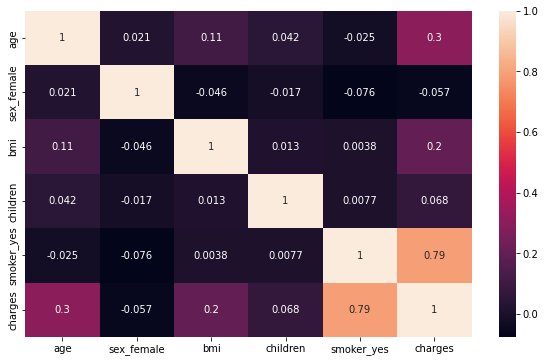

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

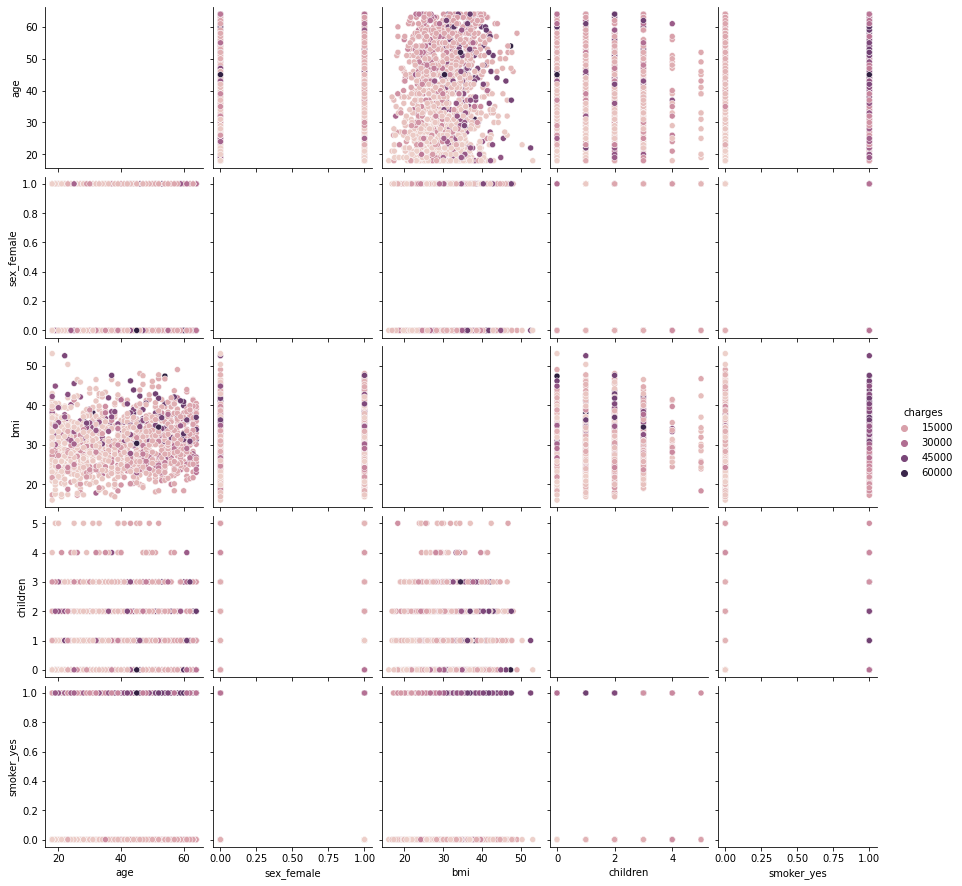

In [11]:
sns.pairplot(df, hue="charges")

[Text(0.5, 0, 'Features'), Text(0, 0.5, 'Values')]

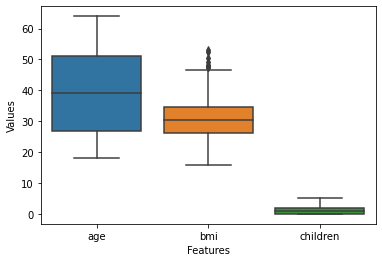

In [12]:
#boxplot for features
sns.boxplot(data=df[["age","bmi","children"]]).set(xlabel="Features", ylabel="Values")

<AxesSubplot:>

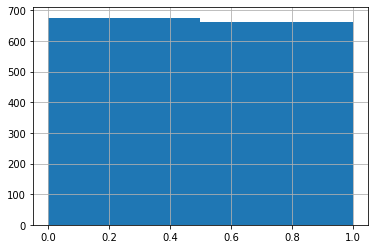

In [13]:
df["sex_female"].hist(bins=2)

0    1064
1     274
Name: smoker_yes, dtype: int64

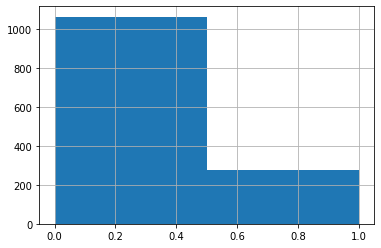

In [22]:
df["smoker_yes"].hist(bins=2)
df["smoker_yes"].value_counts()

# Split the Data
Split your data as follows:
80% training set
10% validation set
10% test set

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0) 

In [17]:
#check to make sure it's split correctly 
print(len(X_train), len(X_test), len(X_validate))

1070 134 134


# Train Regressor
Use decision trees, random forests and support vector regressions (SVRs) to fit your data.

Get r2 scores, mean square error (MSE) scores and mean absolute error (MAE) scores. You need a minimum r2 score of 82%

Compare the results of different models.

Hint: You need to choose the optimal value for the criteria for both decision trees and random forests using cross-validation.

In [18]:
# Decision Tree 
from sklearn.tree import DecisionTreeRegressor
modelDTR = DecisionTreeRegressor(criterion = "squared_error").fit(X_train, y_train)
score = modelDTR.score(X_test, y_test)
y_pred = modelDTR.predict(X_validate)

from sklearn.metrics import mean_squared_error
print("R^2: ", score)
print("MSE: ", str(mean_squared_error(y_validate, y_pred)))


R^2:  0.6486611720546764
MSE:  26852863.692683037


In [19]:
# Random Forest 
from sklearn.ensemble import RandomForestRegressor
modelRFR = RandomForestRegressor(criterion = "squared_error", max_leaf_nodes = 100).fit(X_train, y_train.ravel())
score = modelRFR.score(X_test, y_test)

y_pred = modelRFR.predict(X_validate)

from sklearn.metrics import mean_squared_error
print("R^2: ", score)
print("MSE: ", str(mean_squared_error(y_validate, y_pred)))


R^2:  0.8199061492427564
MSE:  10427396.555693524


In [20]:
# Support vector regressor
from sklearn.svm import SVR
reg = SVR(kernel='rbf', C=0.1, epsilon= 0.1)
reg.fit(X_train, y_train)
score = reg.score(X_test, y_test)

y_pred = reg.predict(X_validate)
    
from sklearn.metrics import mean_squared_error

print("R^2: " + str(score))
print('MSE: ' + str(mean_squared_error(y_validate, y_pred)))

R^2: -0.13951501144855882
MSE: 172080071.3795557


In [21]:
# based on the 3 methods tested, the Random Forest model performs the best with an accuracy of 0.81
# SVR score appears to be in the negative showing it's arbitrarily worse than random 

# Submit the Mini Project on GitHub